# 1) Presentación

## Introducción

**TUIA - Aprendizaje Automático 1** - 2023

---

**Trabajo Práctico Integrador** - "Predicción de lluvia en Australia"

**Alumnos:**  

*   Brisa Menescaldi
*   Miguel Mussi



## Objetivo


Familiarizarse con la librería scikit-learn y las herramientas que brinda para el pre-procesamiento de datos, la implementación de modelos y la evaluación de métricas, y con TensorFlow para el entrenamiento de redes neuronales.

## Dataset



El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las columnas ‘RainTomorrow’ y ‘RainfallTomorrow’. El objetivo es la predicción de estas dos variables en función del resto de las características que se consideren adecuadas.

Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.

## Consignas





1. Armar grupos de hasta dos personas para la realización del trabajo práctico. Dar aviso al cuerpo docente del equipo. En caso de no tener compañero, informar al cuerpo docente.


2. Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una de las variables involucradas en el problema detallando características, comportamiento y rango de variación.
Debe incluir:

> * Análisis y decisión sobre datos faltantes
* Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)
* ¿Está balanceado el dataset?
* Codificación de variables categóricas (si se van a utilizar para predicción).
* Matriz de correlación
* Selección de características para la predicción.
* Estandarización de datos.


3. Implementar la solución del problema de regresión con regresión lineal múltiple.

> * Probar con el método LinearRegression.
* Probar con métodos de gradiente descendiente.
* Probar con métodos de regularización (Lasso, Ridge, Elasticnet).
* Obtener las métricas adecuadas (entre R2 Score, MSE, RMSE, MAE, MAPE).


4. Implementar la solución del problema de clasificación con regresión logística.

> * Obtener las métricas adecuadas (entre Accuracy, precision, recall, F1 Score, ROC-AUC, entre otras).

5. Implementar un modelo base para clasificación y uno para regresión.

6. Implementar las soluciones con una red neuronal.

> * Obtener las métricas adecuadas.


7. Mejorar la selección de hiperparámetros.

> * Probar validación cruzada.
> * Utilizar grid search, random search u optuna. Justificar su uso.

8. Implementar explicabilidad del modelo.
> * Utilizar SHAP o similar.

9. MLOps (a definir).


10. Escribir una conclusión del trabajo

# 2) Análisis descriptivo

## Procedimientos previos

### Paquetes y Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, auc
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip show tensorflow

In [ ]:
!pip install tensorflow==2.12.0

In [157]:
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import warnings
warnings.simplefilter('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### DataFrame

In [5]:
# Path 1 - Referenciado a la carpeta de Drive
df_original = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv', sep=',', engine='python')
# Path 2 - Mismo directorio
# df_original = pd.read_csv('weatherAUS.csv', sep=',', engine='python')

In [8]:
df_original.head(3)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0


### Análisis Exploratorio

In [9]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [10]:
df_original.isna().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

In [11]:
df_original.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


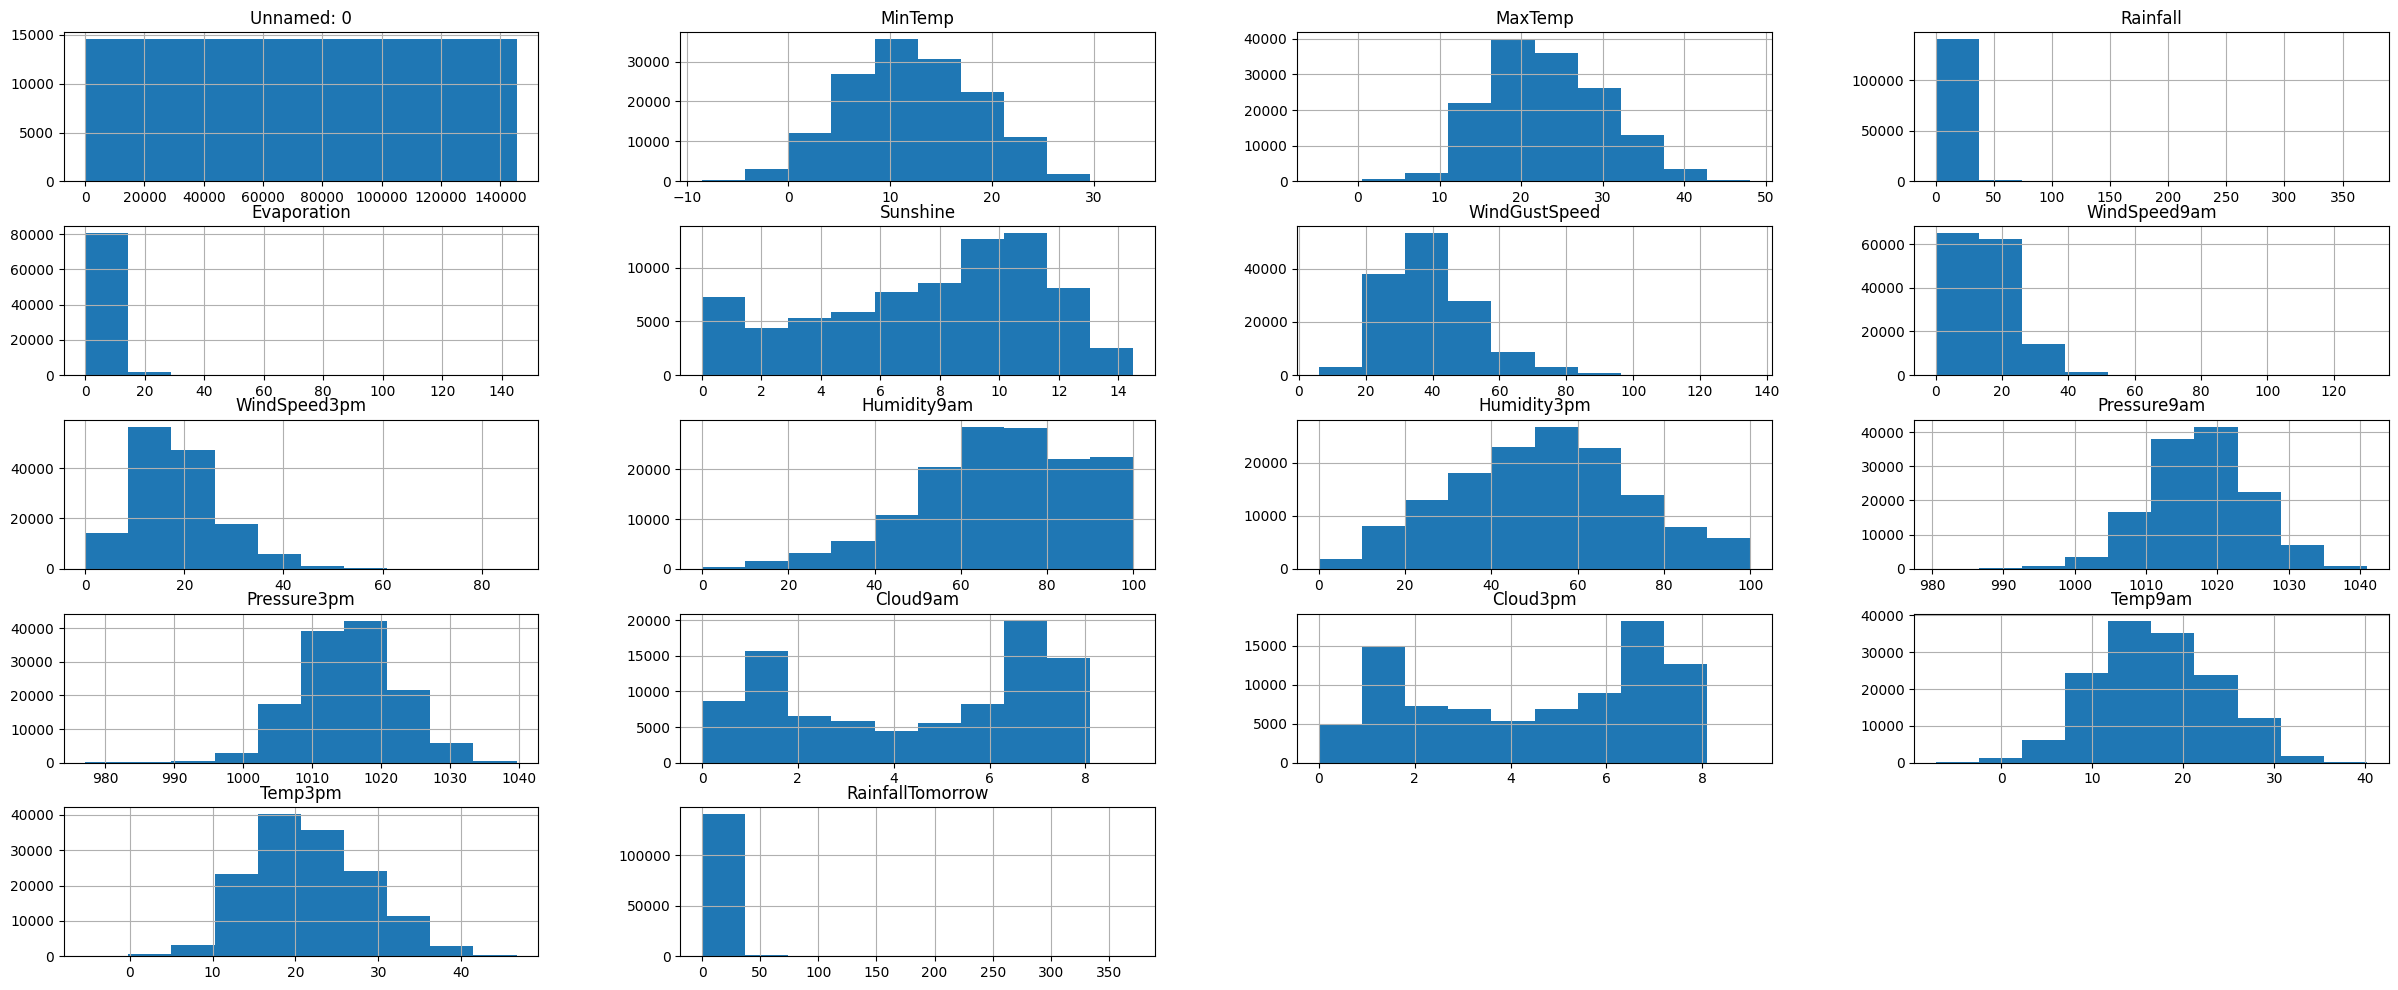

In [12]:
df_original.hist(figsize=(30,12))
plt.show()

In [6]:
# Datos temporales
df_original['Date'] = pd.to_datetime(df_original['Date'])
# Establece 'Date' como el índice del DataFrame (si aún no lo está)
df_original.set_index('Date', inplace=True)

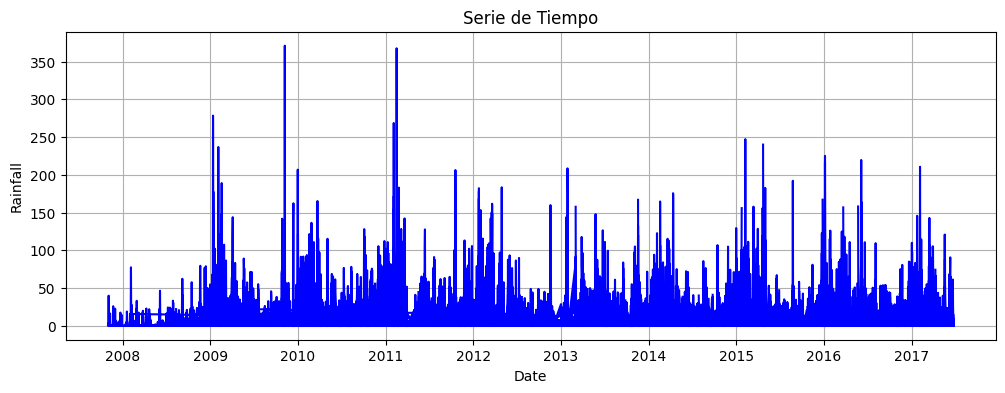

In [7]:
# Serie de Tiempo - Análisis de comportamientos estacionales
plt.figure(figsize=(12, 4))
plt.plot(df_original.index, df_original['Rainfall'], label='Serie de Tiempo', color='b')
plt.title('Serie de Tiempo')
plt.xlabel('Date')
plt.ylabel('Rainfall')
#plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Restablece el índice para convertir "Date" nuevamente en una columna
df_original.reset_index(inplace=True)

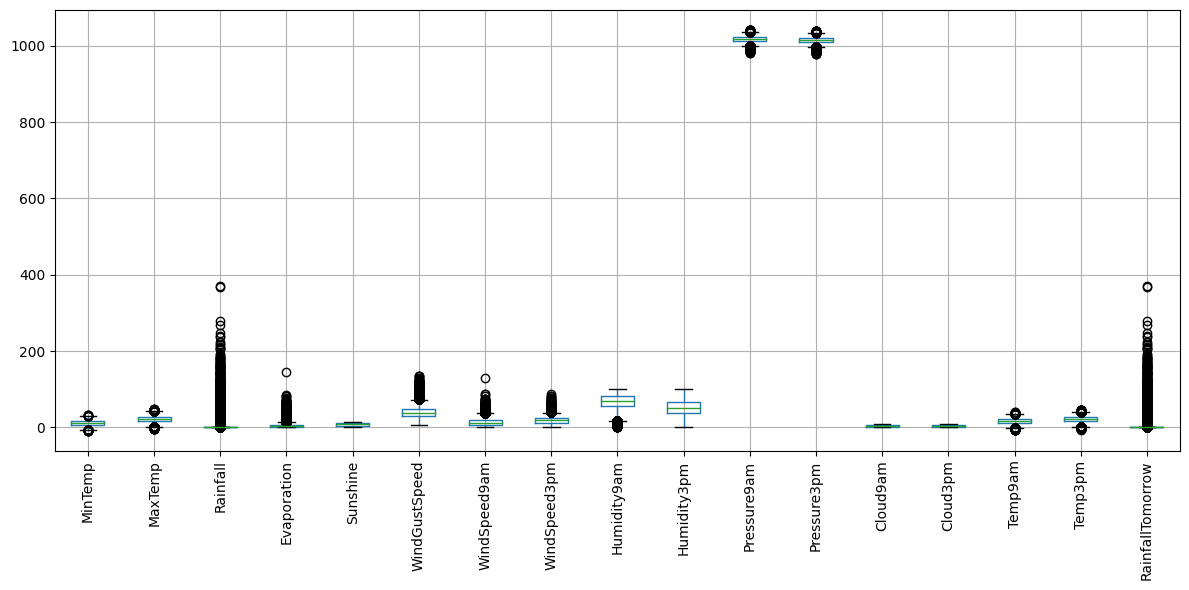

In [12]:
# Boxplot de los atributos a modo exploratorio
plt.figure(figsize=(12, 6))
df_original.boxplot(rot=90)
plt.tight_layout()  #para que las etiquetas no se superpongan
plt.show()

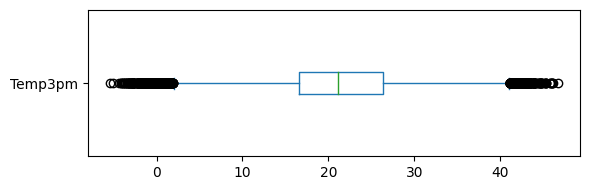

In [17]:
# Boxplot por atributo individual
# Para ver de más cerca las columnas con menos rango
target = 'Temp3pm'
plt.figure(figsize=(6, 2))
df_original[target].plot(kind='box', vert=False)
plt.tight_layout()
plt.show()

## Procesamiento del Dataframe

### Eliminación de columnas

In [10]:
# Eliminación de la primera columa (Unnamed)
df_original = df_original.drop(['Unnamed: 0'], axis=1)

In [11]:
# Eliminación de la columa fecha
df_original = df_original.drop(['Date'], axis=1)

### Filtrado de ciudades

In [13]:
df_original.shape

(145412, 23)

In [14]:
# Copia del DF original con los registros correspondientes a la costa sureste
ciudades_a_conservar = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne', 'MelbourneAirport']
df = df_original[df_original['Location'].isin(ciudades_a_conservar)].copy()

In [15]:
df['Location'] = df['Location'].astype('category')

In [16]:
# Agrupar por etiqueta y contar la frecuencia
Location_frec = df['Location'].value_counts()
Location_frec

Canberra            3435
Sydney              3343
Melbourne           3192
MelbourneAirport    3008
SydneyAirport       3008
Name: Location, dtype: int64

In [17]:
df.shape

(15986, 23)

### Datos nulos y faltantes

Datos faltantes en variables booleanas

In [18]:
# Eliminación de registros con datos nulos/faltantes en variables booleanas
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

Datos faltantes en el resto de las variables

> Opción A: Imputación por la media. Listado manual (NO USADA).
Se descarta la posibilidad de imputar por la media debido a la presencia de valores atípicos en las variables.

In [22]:
''' Imputación por la media --- No usada --- Se optó por la Opción B ---

# Eliminación de registros con datos nulos/faltantes en variables booleanas
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Se reemplaza valores nulos por las medias de cada columna que los contiene
df['MinTemp'].fillna(value=df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(value=df['MaxTemp'].mean(), inplace=True)
df['Rainfall'].fillna(value=df['Rainfall'].mean(), inplace=True) # No quedan nulos acá
df['Evaporation'].fillna(value=df['Evaporation'].mean(), inplace=True)
df['Sunshine'].fillna(value=df['Sunshine'].mean(), inplace=True)
df['WindGustSpeed'].fillna(value=df['WindGustSpeed'].mean(), inplace=True)
df['WindSpeed9am'].fillna(value=df['WindSpeed9am'].mean(), inplace=True)
df['WindSpeed3pm'].fillna(value=df['WindSpeed3pm'].mean(), inplace=True)
df['Humidity9am'].fillna(value=df['Humidity9am'].mean(), inplace=True)
df['Humidity3pm'].fillna(value=df['Humidity3pm'].mean(), inplace=True)
df['Pressure9am'].fillna(value=df['Pressure9am'].mean(), inplace=True)
df['Pressure3pm'].fillna(value=df['Pressure3pm'].mean(), inplace=True)
df['Cloud9am'].fillna(value=df['Cloud9am'].mean(), inplace=True)
df['Cloud3pm'].fillna(value=df['Cloud3pm'].mean(), inplace=True)
df['Temp9am'].fillna(value=df['Temp9am'].mean(), inplace=True)
df['Temp3pm'].fillna(value=df['Temp3pm'].mean(), inplace=True)


> Opción B: Imputación por la mediana. Listado iterativo. Mas robusta frente a outliers

In [19]:
# Lista de variables numéricas
t = (df.dtypes == "float64")
num_cols = list(t[t].index)
# Se reemplaza valores nulos por las medianas de cada columna que los contiene
for i in num_cols:
    df[i].fillna(df[i].median(), inplace=True)

### Recategorización de variables

In [20]:
df['RainToday'] = df['RainToday'].astype('category')
df['RainTomorrow'] = df['RainTomorrow'].astype('category')

In [21]:
# Reemplazo de Yes/No
df['RainToday'] = df['RainToday'].replace('Yes',1)
df['RainToday'] = df['RainToday'].replace('No',0)
df['RainTomorrow'] = df['RainTomorrow'].replace('Yes',1)
df['RainTomorrow'] = df['RainTomorrow'].replace('No',0)
df['RainToday'] = df['RainToday'].astype(int)
df['RainTomorrow'] = df['RainTomorrow'].astype(int)

In [22]:
# Reemplazo de Coordenadas
mapeo_coord = {
    'E': 0, 'N': 90, 'W': 180, 'S': 270,
    'NNE': 45, 'ENE': 22.5, 'ESE': 337.5, 'SSE': 292.5,
    'SSO': 247.5, 'OSO': 202.5, 'ONO': 112.5, 'NNO': 67.5}
df['WindGustDir'] = df['WindGustDir'].map(mapeo_coord)
df['WindDir9am'] = df['WindDir9am'].map(mapeo_coord)
df['WindDir3pm'] = df['WindDir3pm'].map(mapeo_coord)
df.dropna(subset=['WindGustDir', 'WindDir9am', 'WindDir3pm'], inplace=True)

### Reseteo de los índices del DF

In [23]:
# Reseteo de índices del dataframe
df = df.copy().reset_index(drop=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,Sydney,13.8,19.5,0.0,4.6,9.5,337.5,35.0,45.0,337.5,...,56.0,1018.5,1016.3,6.0,1.0,16.5,19.1,0,0,0.0
1,Sydney,16.7,23.9,0.4,7.0,2.8,45.0,39.0,180.0,22.5,...,64.0,1018.5,1016.3,7.0,5.0,17.8,22.9,0,1,2.0
2,Sydney,9.9,24.0,0.0,6.6,12.1,180.0,41.0,180.0,292.5,...,30.0,1012.9,1011.3,6.0,6.0,14.7,23.3,0,0,0.0
3,Sydney,14.0,19.0,3.8,6.4,0.8,292.5,37.0,292.5,292.5,...,53.0,1018.5,1026.2,8.0,7.0,14.7,17.1,1,0,0.2
4,Sydney,12.9,20.3,0.2,3.0,10.9,22.5,37.0,180.0,0.0,...,57.0,1028.8,1025.6,3.0,1.0,16.9,19.8,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,Melbourne,11.9,17.8,0.0,1.4,4.1,90.0,54.0,90.0,90.0,...,63.0,1017.5,1012.0,7.0,7.0,13.9,17.2,0,1,6.8
3122,Melbourne,7.7,19.0,0.0,2.2,2.2,90.0,20.0,45.0,90.0,...,53.0,1027.7,1024.8,7.0,6.0,9.8,17.4,0,0,0.0
3123,Melbourne,6.6,17.1,0.0,1.0,4.8,45.0,15.0,45.0,270.0,...,65.0,1026.4,1023.8,5.0,3.0,8.4,15.9,0,0,0.0
3124,Melbourne,6.4,15.8,0.0,2.4,8.8,90.0,39.0,45.0,90.0,...,56.0,1028.1,1024.5,1.0,7.0,7.9,15.6,0,0,0.6


### Comprobaciones finales y verificaciones

In [24]:
df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,Sydney,13.8,19.5,0.0,4.6,9.5,337.5,35.0,45.0,337.5,...,56.0,1018.5,1016.3,6.0,1.0,16.5,19.1,0,0,0.0
1,Sydney,16.7,23.9,0.4,7.0,2.8,45.0,39.0,180.0,22.5,...,64.0,1018.5,1016.3,7.0,5.0,17.8,22.9,0,1,2.0
2,Sydney,9.9,24.0,0.0,6.6,12.1,180.0,41.0,180.0,292.5,...,30.0,1012.9,1011.3,6.0,6.0,14.7,23.3,0,0,0.0


In [25]:
df.isna().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

In [ ]:
df.describe()

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,3126.0,12.254766,5.618470,-6.8,8.125,12.2,16.600,30.5
MaxTemp,3126.0,22.111356,6.035873,8.4,17.600,21.8,25.975,46.4
Rainfall,3126.0,1.945489,6.965085,0.0,0.000,0.0,0.400,119.4
Evaporation,3126.0,5.039923,3.214767,0.0,2.600,4.2,6.800,23.8
Sunshine,3126.0,6.795553,3.818733,0.0,3.800,7.6,9.800,13.7
WindGustDir,3126.0,148.826775,108.479312,0.0,90.000,90.0,270.000,337.5
WindGustSpeed,3126.0,46.368202,15.929919,11.0,35.000,43.0,57.000,107.0
WindDir9am,3126.0,158.845969,100.389192,0.0,90.000,90.0,270.000,337.5
WindDir3pm,3126.0,151.842610,118.338446,0.0,45.000,90.0,270.000,337.5
WindSpeed9am,3126.0,20.328855,12.143014,2.0,11.000,17.0,28.000,67.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Location          3126 non-null   category
 1   MinTemp           3126 non-null   float64 
 2   MaxTemp           3126 non-null   float64 
 3   Rainfall          3126 non-null   float64 
 4   Evaporation       3126 non-null   float64 
 5   Sunshine          3126 non-null   float64 
 6   WindGustDir       3126 non-null   float64 
 7   WindGustSpeed     3126 non-null   float64 
 8   WindDir9am        3126 non-null   float64 
 9   WindDir3pm        3126 non-null   float64 
 10  WindSpeed9am      3126 non-null   float64 
 11  WindSpeed3pm      3126 non-null   float64 
 12  Humidity9am       3126 non-null   float64 
 13  Humidity3pm       3126 non-null   float64 
 14  Pressure9am       3126 non-null   float64 
 15  Pressure3pm       3126 non-null   float64 
 16  Cloud9am          3126 n

## Visualizaciones

### Histogramas

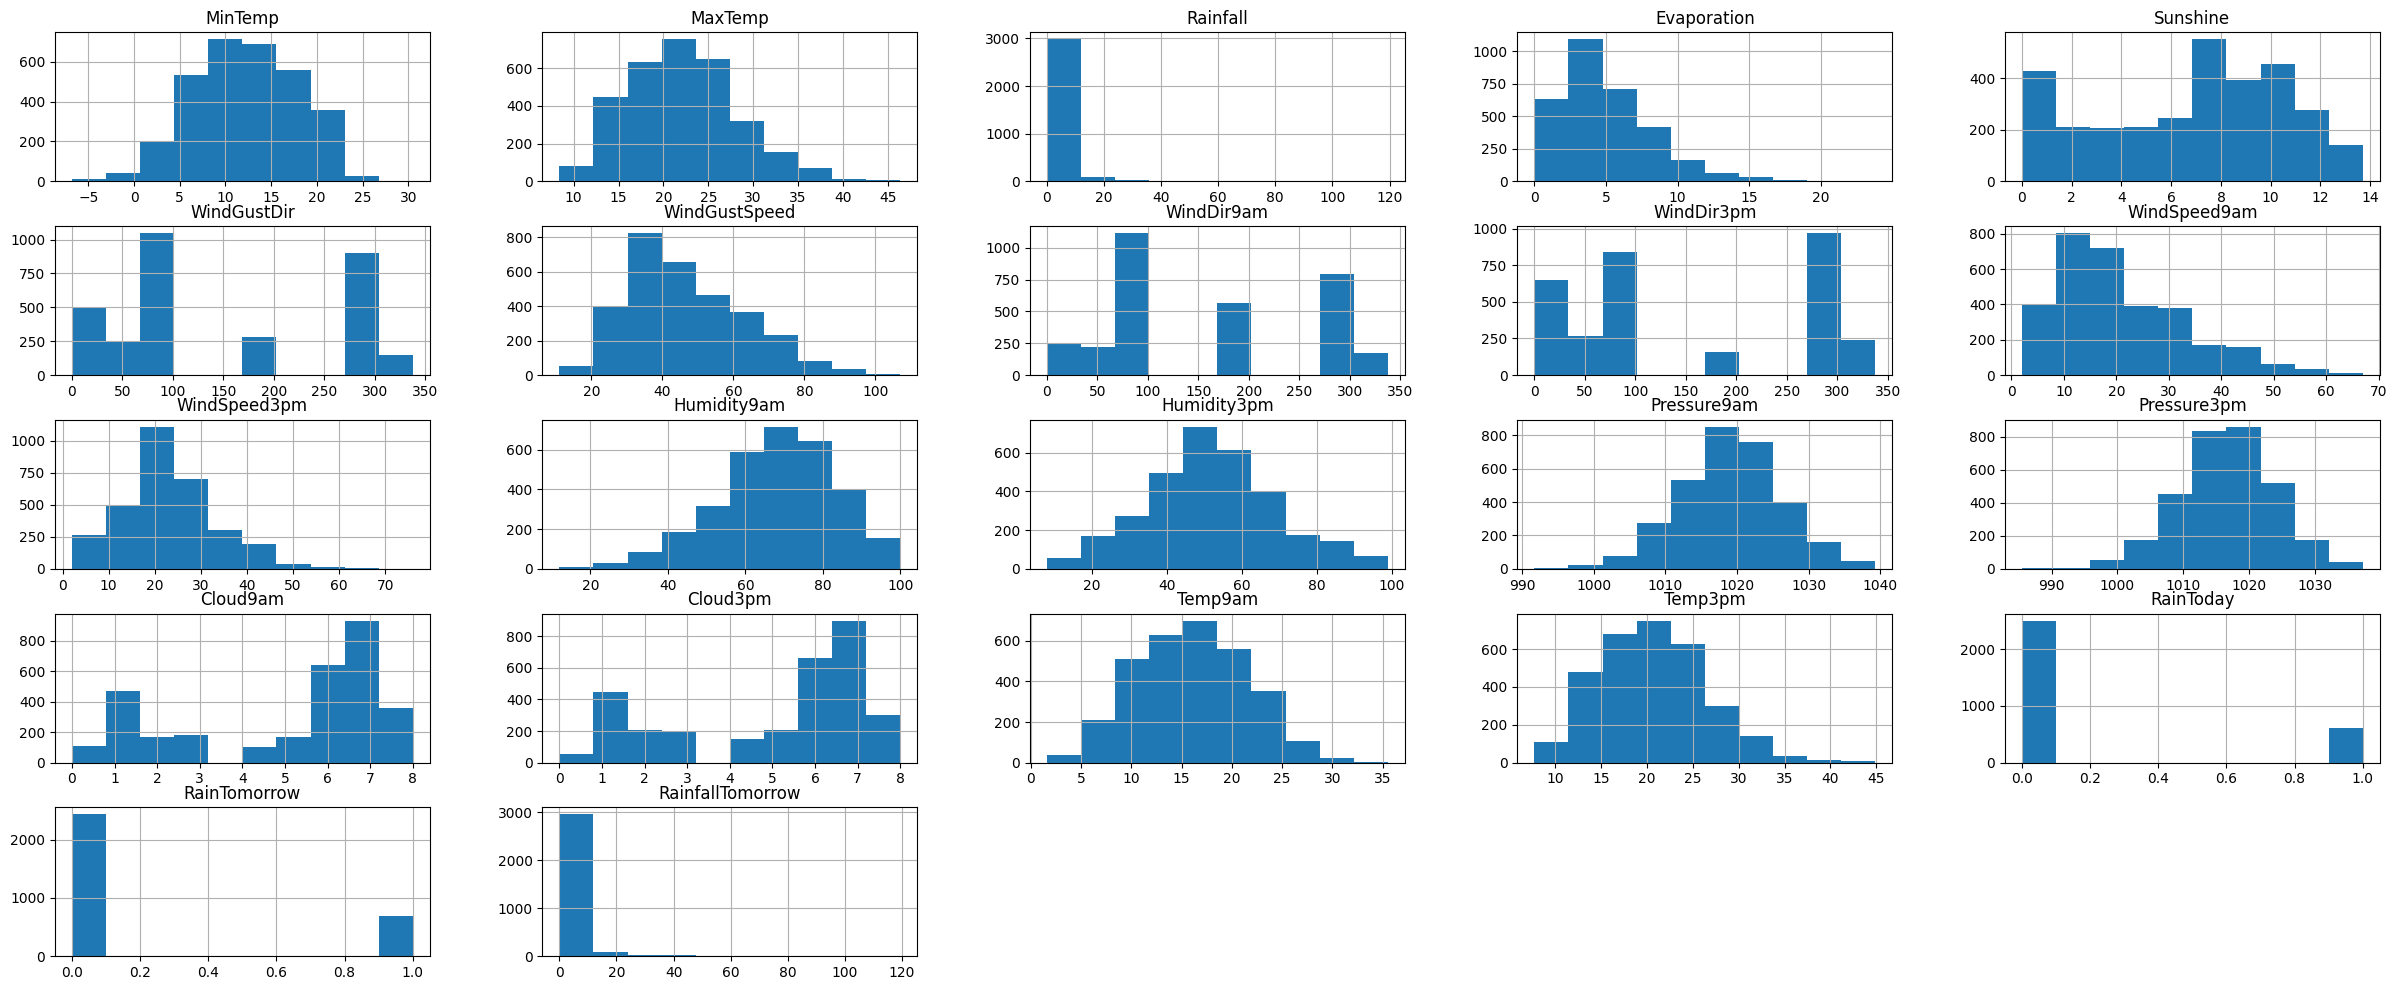

In [68]:
df.hist(figsize=(30,12))
plt.show()

### Boxplots

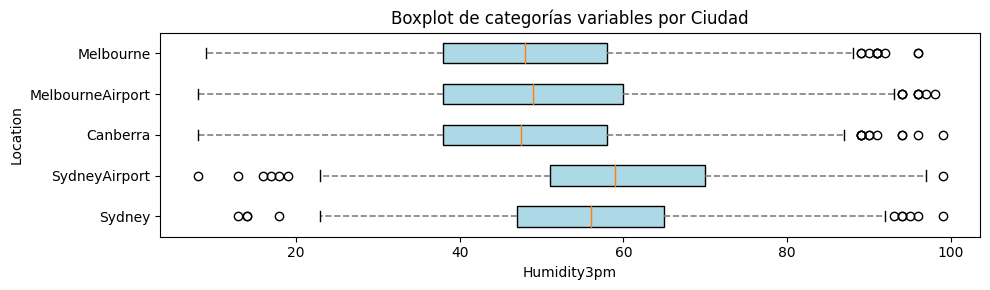

In [28]:
#@title Boxplot de atributos variables por ciudad

# Variable a analizar (Disponibles)
# Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine
# WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am
# WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm
# Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow, RainfallTomorrow
target = 'Humidity3pm'

# Configuración de estilo y tamaño del gráfico
plt.figure(figsize=(10, 3))

# Crear el gráfico de boxplot con barrios en el eje vertical y precios en el eje horizontal
boxplot = plt.boxplot([df[df['Location'] == location][target] for location in df['Location'].unique()],
                      vert=False,  # Boxplots horizontales
                      patch_artist=True)  # Para personalizar colores de los cuadros

# Personalizar el color de los cuadros (box) y los bigotes (whisker)
for box in boxplot['boxes']:
    box.set(facecolor='lightblue')
for whisker in boxplot['whiskers']:
    whisker.set(color='gray', linewidth=1.2, linestyle='--')

# Etiquetas y título del gráfico
plt.yticks(range(1, len(df['Location'].unique()) + 1), df['Location'].unique())  # Etiquetas en el eje y
plt.xlabel(target)
plt.ylabel('Location')
plt.title('Boxplot de categorías variables por Ciudad')

# Desactivar notación científica en el eje horizontal
# plt.ticklabel_format(axis='x', style='plain')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Correlaciones

In [29]:
corr = df.corr()
# corr

### Matriz de Correlación

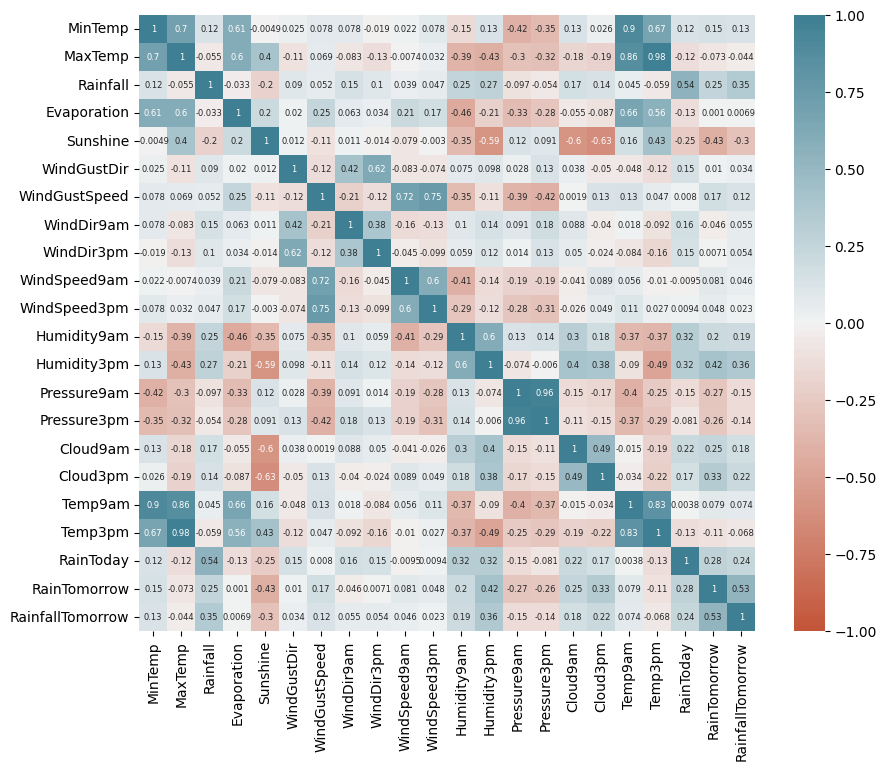

In [30]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

## Estandarización

In [73]:
#@title Estandarización Z-score
df_sub = df.drop(['Location'], axis=1) # Eliminación de variables no numéricas
scaler = StandardScaler() # Creación del objeto scaler
X_scaled = scaler.fit_transform(df_sub) # Cálculo de la media y la desviación estándar y aplicación de la transformación de estandarización.
df_std = pd.DataFrame(X_scaled, columns=df_sub.columns)
df_std

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0.275071,-0.432709,-0.279365,-0.136866,0.708318,1.739534,-0.713753,-1.134228,1.569119,-1.344927,...,0.232726,-0.080386,-0.040588,0.367951,-1.674563,0.085950,-0.260089,-0.496399,-0.534193,-0.293607
1,0.791309,0.296383,-0.221926,0.609808,-1.046471,-0.957264,-0.462613,0.210754,-1.093164,-1.097832,...,0.705821,-0.080386,-0.040588,0.762672,-0.020242,0.323831,0.401781,-0.496399,1.871984,-0.039850
2,-0.419179,0.312953,-0.279365,0.485362,1.389281,0.287412,-0.337043,0.210754,1.188793,0.302374,...,-1.304833,-0.872061,-0.741256,0.367951,0.393338,-0.243425,0.471452,-0.496399,-0.534193,-0.293607
3,0.310674,-0.515560,0.266301,0.423139,-1.570288,1.324642,-0.588183,1.331572,1.188793,-0.274181,...,0.055316,-0.080386,1.346735,1.157393,0.806918,-0.243425,-0.608442,2.014510,-0.534193,-0.268231
4,0.114860,-0.300146,-0.250646,-0.634649,1.074991,-1.164710,-0.588183,0.210754,-1.283327,-0.768372,...,0.291863,1.375731,1.262655,-0.816211,-1.674563,0.159144,-0.138165,-0.496399,-0.534193,-0.293607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,-0.063153,-0.714403,-0.279365,-1.132432,-0.705989,-0.542372,0.479162,-0.685900,-0.522675,-0.027086,...,0.646684,-0.221756,-0.643162,0.762672,0.806918,-0.389814,-0.591024,-0.496399,1.871984,0.569169
3122,-0.810807,-0.515560,-0.279365,-0.883541,-1.203616,-0.542372,-1.655528,-1.134228,-0.522675,-0.933102,...,0.055316,1.220223,1.150548,0.762672,0.393338,-1.140056,-0.556189,-0.496399,-0.534193,-0.293607
3123,-1.006621,-0.830395,-0.279365,-1.256878,-0.522653,-0.957264,-1.969453,-1.134228,0.998630,-0.933102,...,0.764958,1.036442,1.010414,-0.026769,-0.847403,-1.396236,-0.817453,-0.496399,-0.534193,-0.293607
3124,-1.042224,-1.045808,-0.279365,-0.821318,0.524982,-0.542372,-0.462613,-1.134228,-0.522675,-0.768372,...,0.232726,1.276772,1.108508,-1.605652,0.806918,-1.487729,-0.869706,-0.496399,-0.534193,-0.217480


In [31]:
#@title Estandarización Z-score (Excluyendo variables categóricas)

# Lista de columnas a excluir de la estandarización
columns_to_exclude = ['Location', 'RainToday', 'RainTomorrow']
# Estandarización
df_sub = df[[col for col in df.columns if col not in columns_to_exclude]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sub)

# Crear un nuevo DataFrame estandarizado con los nombres de las columnas originales
df_std = pd.DataFrame(X_scaled, columns=df_sub.columns)

# Mantenemos las columnas excluídas del estandarizado
# df_std['Location'] = df['Location']
df_std['RainToday'] = df['RainToday']
df_std['RainTomorrow'] = df['RainTomorrow']
df_std

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow,RainToday,RainTomorrow
0,0.275071,-0.432709,-0.279365,-0.136866,0.708318,1.739534,-0.713753,-1.134228,1.569119,-1.344927,...,0.232726,-0.080386,-0.040588,0.367951,-1.674563,0.085950,-0.260089,-0.293607,0,0
1,0.791309,0.296383,-0.221926,0.609808,-1.046471,-0.957264,-0.462613,0.210754,-1.093164,-1.097832,...,0.705821,-0.080386,-0.040588,0.762672,-0.020242,0.323831,0.401781,-0.039850,0,1
2,-0.419179,0.312953,-0.279365,0.485362,1.389281,0.287412,-0.337043,0.210754,1.188793,0.302374,...,-1.304833,-0.872061,-0.741256,0.367951,0.393338,-0.243425,0.471452,-0.293607,0,0
3,0.310674,-0.515560,0.266301,0.423139,-1.570288,1.324642,-0.588183,1.331572,1.188793,-0.274181,...,0.055316,-0.080386,1.346735,1.157393,0.806918,-0.243425,-0.608442,-0.268231,1,0
4,0.114860,-0.300146,-0.250646,-0.634649,1.074991,-1.164710,-0.588183,0.210754,-1.283327,-0.768372,...,0.291863,1.375731,1.262655,-0.816211,-1.674563,0.159144,-0.138165,-0.293607,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,-0.063153,-0.714403,-0.279365,-1.132432,-0.705989,-0.542372,0.479162,-0.685900,-0.522675,-0.027086,...,0.646684,-0.221756,-0.643162,0.762672,0.806918,-0.389814,-0.591024,0.569169,0,1
3122,-0.810807,-0.515560,-0.279365,-0.883541,-1.203616,-0.542372,-1.655528,-1.134228,-0.522675,-0.933102,...,0.055316,1.220223,1.150548,0.762672,0.393338,-1.140056,-0.556189,-0.293607,0,0
3123,-1.006621,-0.830395,-0.279365,-1.256878,-0.522653,-0.957264,-1.969453,-1.134228,0.998630,-0.933102,...,0.764958,1.036442,1.010414,-0.026769,-0.847403,-1.396236,-0.817453,-0.293607,0,0
3124,-1.042224,-1.045808,-0.279365,-0.821318,0.524982,-0.542372,-0.462613,-1.134228,-0.522675,-0.768372,...,0.232726,1.276772,1.108508,-1.605652,0.806918,-1.487729,-0.869706,-0.217480,0,0


In [32]:
df_std.describe().round(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow,RainToday,RainTomorrow
count,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,...,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000,3126.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,...,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.198,0.222
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.398,0.416
min,-3.392,-2.272,-0.279,-1.568,-1.780,-1.372,-2.221,-1.583,-1.283,-1.510,...,-2.606,-3.869,-4.357,-2.000,-2.088,-2.641,-2.246,-0.294,0.000,0.000
25%,-0.735,-0.748,-0.279,-0.759,-0.785,-0.542,-0.714,-0.686,-0.903,-0.768,...,-0.654,-0.642,-0.643,-0.816,-0.847,-0.756,-0.748,-0.294,0.000,0.000
50%,-0.010,-0.052,-0.279,-0.261,0.211,-0.542,-0.211,-0.686,-0.523,-0.274,...,-0.004,0.004,0.015,0.368,0.393,-0.006,-0.051,-0.294,0.000,0.000
75%,0.774,0.640,-0.222,0.548,0.787,1.117,0.668,1.107,0.999,0.632,...,0.647,0.669,0.688,0.763,0.807,0.745,0.663,-0.217,0.000,0.000
max,3.248,4.025,16.866,5.837,1.808,1.740,3.807,1.780,1.569,3.844,...,2.776,2.860,2.902,1.157,1.220,3.563,4.234,14.856,1.000,1.000


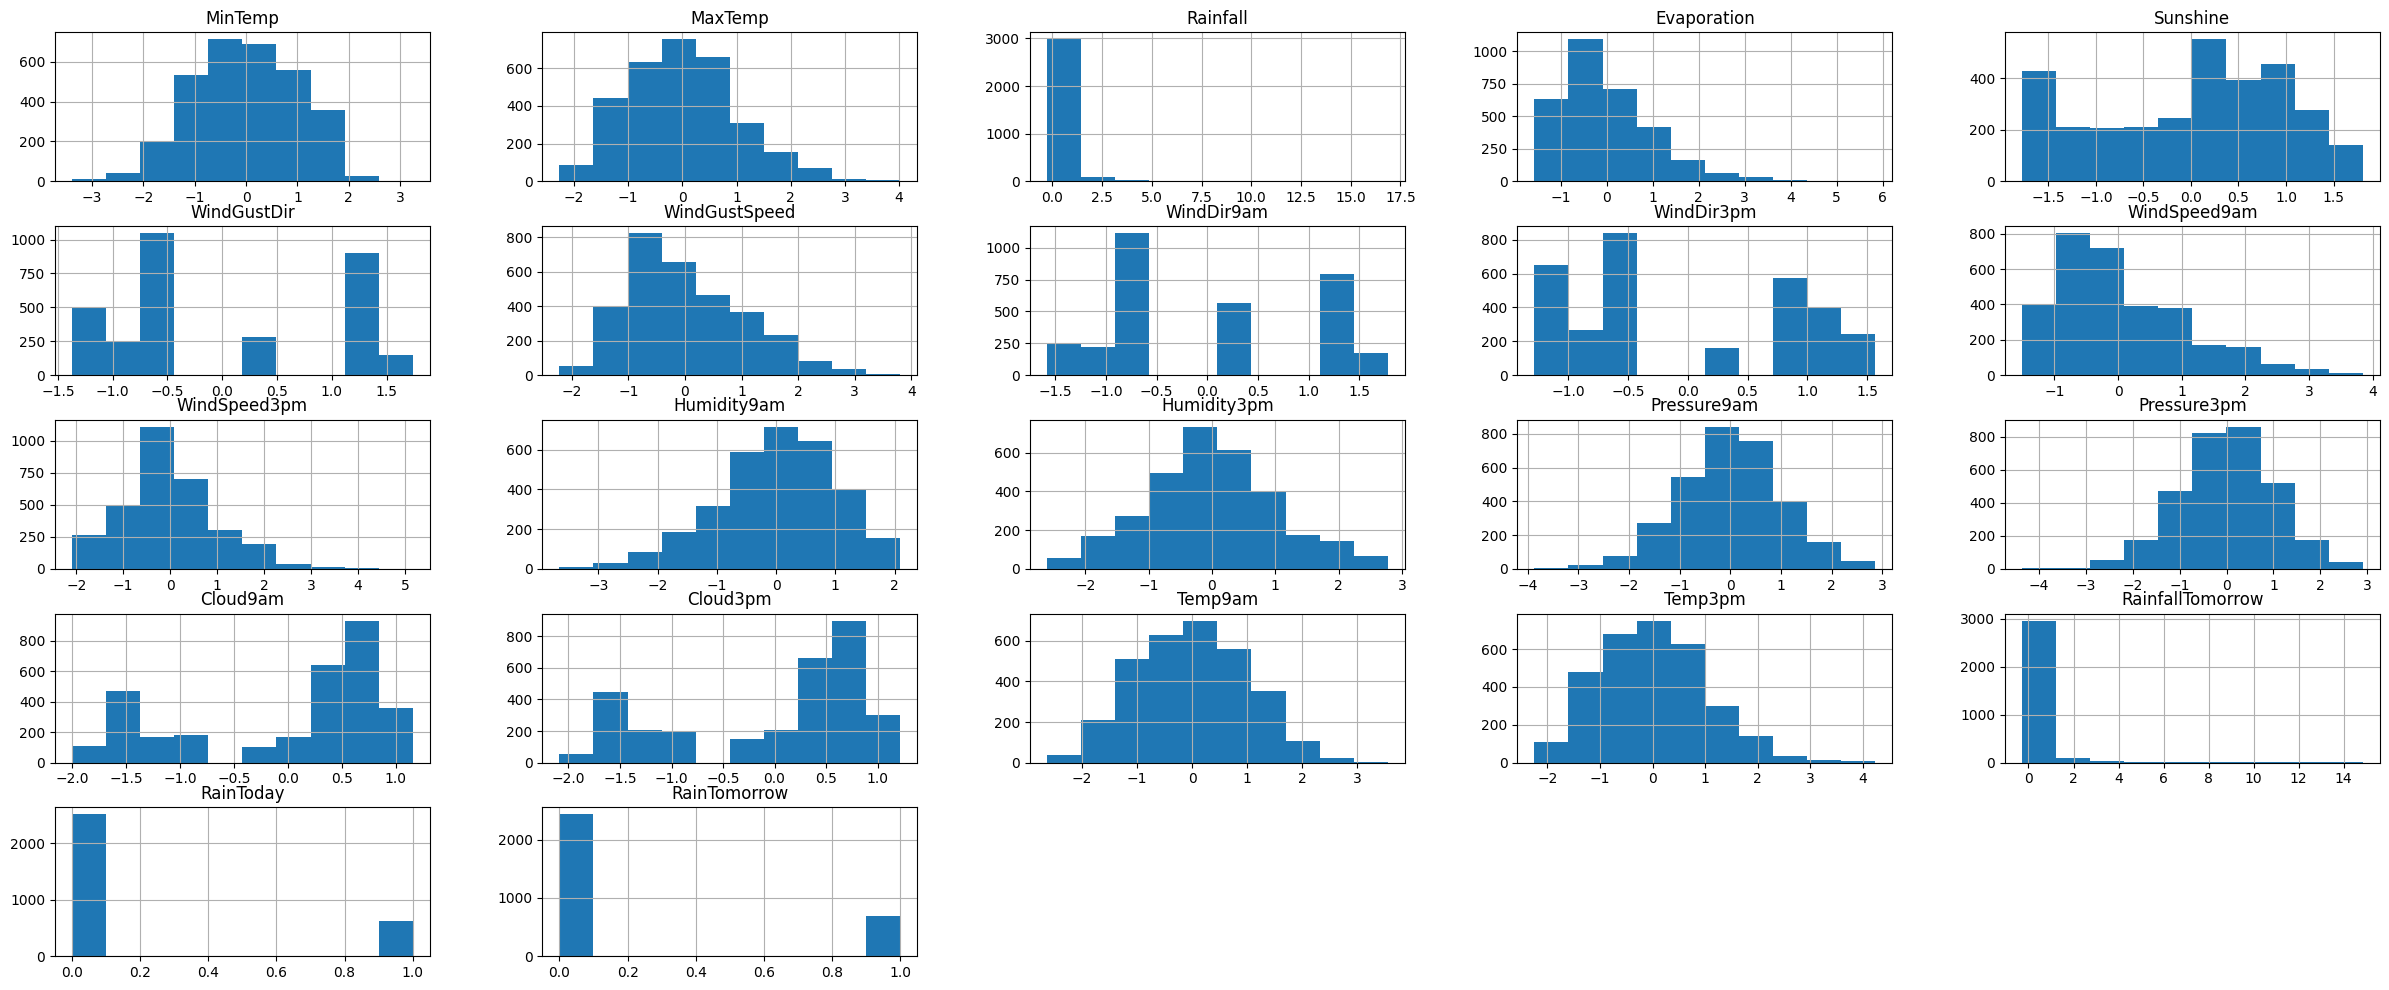

In [75]:
#@title Histogramas con las variables estandarizadas
df_std.hist(figsize=(30,12))
plt.show()

## Detección y filtrado de Outliers

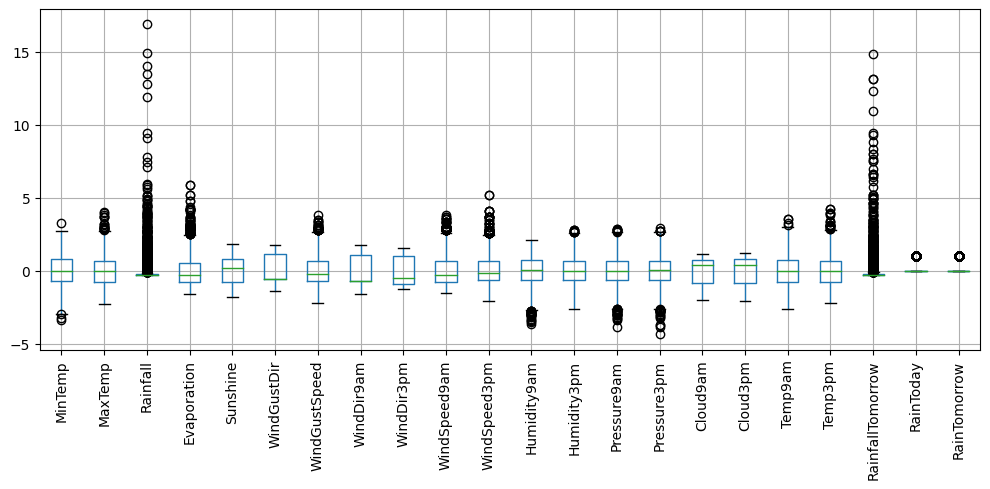

In [33]:
# Boxplot de las variables estandarizadas
plt.figure(figsize=(10, 5))
df_std.boxplot(rot=90)
plt.tight_layout()  #para que las etiquetas no se superpongan
plt.show()

In [188]:
# df_out = df_std.drop(['RainTomorrow'], axis=1)
# target = df['RainTomorrow']

In [34]:
df_std.shape

(3126, 22)

In [35]:
# Eliminación de outliers según cotas en sus desvíos
df_std = df_std[(df_std["MinTemp"]<2.3)&(df_std["MinTemp"]>-2.3)]
df_std = df_std[(df_std["MaxTemp"]<2.3)&(df_std["MaxTemp"]>-2)]
df_std = df_std[(df_std["Rainfall"]<2)]  # <<< ACOTAR >>>
df_std = df_std[(df_std["Evaporation"]<2.1)]
df_std = df_std[(df_std["Sunshine"]<2.1)]
df_std = df_std[(df_std["WindGustSpeed"]<2)&(df_std["WindGustSpeed"]>-4)]
df_std = df_std[(df_std["WindSpeed9am"]<1.9)]
df_std = df_std[(df_std["WindSpeed3pm"]<2)]
df_std = df_std[(df_std["Humidity9am"]>-2.4)]
df_std = df_std[(df_std["Humidity3pm"]>-2.2)&(df_std["Humidity3pm"]<2)]
df_std = df_std[(df_std["Pressure9am"]< 2)&(df_std["Pressure9am"]>-2.1)]
df_std = df_std[(df_std["Pressure3pm"]< 2)&(df_std["Pressure3pm"]>-2.1)]
df_std = df_std[(df_std["Cloud9am"]<1.8)]
df_std = df_std[(df_std["Cloud3pm"]<2)]
df_std = df_std[(df_std["Temp9am"]<2.3)&(df_std["Temp9am"]>-2)]
df_std = df_std[(df_std["Temp3pm"]<2.3)&(df_std["Temp3pm"]>-2)]
df_std = df_std[(df_std["RainfallTomorrow"]<2)]  # <<< ACOTAR >>>

df_std.shape

(2292, 22)

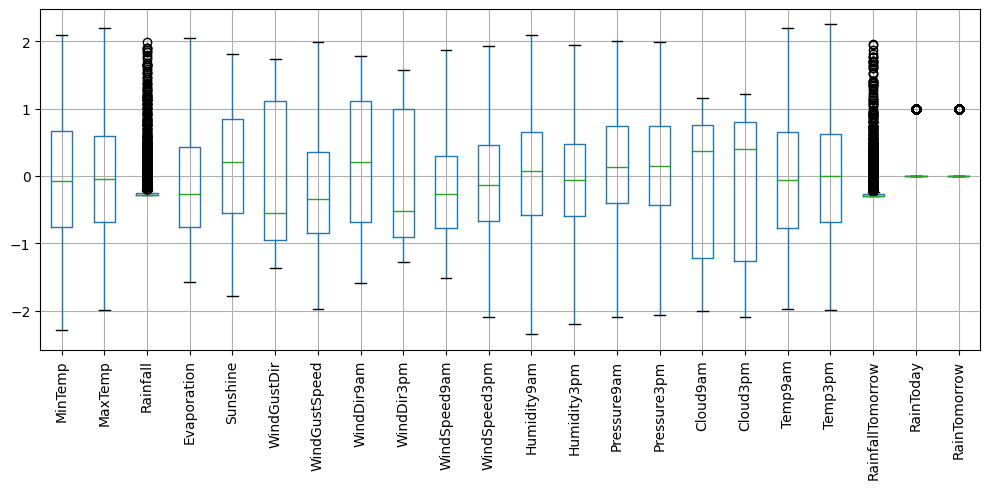

In [36]:
# Boxplot de las variables estandarizadas
plt.figure(figsize=(10, 5))
df_std.boxplot(rot=90)
plt.tight_layout()  #para que las etiquetas no se superpongan
plt.show()

## Balance de Datos

In [96]:
# Separación de variables explicativas y variables objetivo
X = df_std.drop(['RainfallTomorrow', 'RainTomorrow'], axis=1).copy()
y = df_std[['RainfallTomorrow', 'RainTomorrow']].copy()

In [97]:
# Conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1833, 20), (459, 20), (1833, 2), (459, 2))

In [99]:
# Crear un nuevo DataFrame para TRAIN y para TEST
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['RainTomorrow'] = y['RainTomorrow']
df_train['RainfallTomorrow'] = y['RainfallTomorrow']

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['RainTomorrow'] = y['RainTomorrow']
df_test['RainfallTomorrow'] = y['RainfallTomorrow']

0    1543
1     290
Name: RainTomorrow, dtype: int64


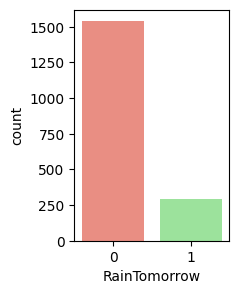

In [101]:
#@title Balance de RainTomorrow (No/Yes)
cols= ["salmon","lightgreen"]
plt.figure(figsize=(2, 3))
sns.countplot(x=df_train["RainTomorrow"], palette= cols)
print(df_train['RainTomorrow'].value_counts())
plt.show()

### SMOTE - "Synthetic Minority Over-sampling Technique"

In [103]:
X_smote = df_train.drop('RainTomorrow', axis=1)
y_smote = df_train['RainTomorrow']

In [104]:
# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_smote, y_smote)

In [105]:
X_train_resampled.shape, y_train_resampled.shape

((3086, 21), (3086,))

In [106]:
# Crear un nuevo DataFrame con los datos resampleados
df_smote = pd.DataFrame(X_train_resampled, columns=X_smote.columns)
# Añadir la columna 'RainTomorrow' al DataFrame resampleado
df_smote['RainTomorrow'] = y_train_resampled

In [107]:
df_smote

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainfallTomorrow,RainTomorrow
0,-0.775204,-0.250436,-0.279365,-1.070209,0.891655,1.324642,-0.839323,0.210754,1.188793,-0.274181,...,-0.713464,1.828117,1.893256,-2.000372,-1.674563,-1.103459,-0.538771,0,-0.293607,0
1,-1.095628,-0.051593,-0.279365,-0.447981,0.865464,-0.542372,-0.964893,-0.685900,-0.522675,-1.180197,...,-0.299506,0.923345,0.702120,1.157393,-0.020242,-1.011966,0.036011,0,-0.293607,0
2,0.684501,0.644358,0.323739,-0.261312,-0.496462,1.739534,0.102452,-0.685900,-0.522675,-1.180197,...,0.232726,-1.140665,-1.147643,0.762672,0.806918,0.415324,0.471452,1,1.609575,1
3,1.271943,0.710639,-0.193207,-0.696872,0.315455,-1.372156,-0.023118,-1.582555,-1.283327,0.137644,...,0.291863,-0.730691,-0.601122,0.367951,-0.433823,1.257059,0.802387,0,-0.065225,1
4,1.218540,0.528367,-0.193207,-0.012421,1.048800,-1.372156,-1.153248,-1.582555,-1.093164,-0.438911,...,-0.003821,0.386137,0.463893,0.367951,0.393338,1.220462,0.767552,0,-0.293607,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,0.949627,0.473497,-0.259826,-0.557638,0.281966,-1.164710,-0.412175,-1.582555,-1.283327,-0.432158,...,0.393657,-0.772522,-0.713687,0.620310,0.657754,0.830647,0.541981,0,0.342656,1
3082,0.081799,-1.203065,0.147099,-0.261312,0.210692,-1.352932,-1.022587,1.107408,-1.274515,-0.935964,...,1.583284,-0.391020,-0.127375,1.157393,0.811709,-0.575979,-1.087459,0,0.456694,1
3083,0.604956,-0.088336,1.508440,-0.858806,-1.242845,1.739534,-0.544840,1.018300,-1.283327,-1.053032,...,0.868383,0.309719,0.436575,0.965811,0.819028,0.275982,-0.036426,1,0.715794,1
3084,-1.130865,-1.277792,-0.128147,-0.945764,-0.629567,-0.542372,0.384340,-1.079337,-0.522675,0.806649,...,1.195825,-0.799075,-0.972630,0.666018,-0.898039,-1.031753,-1.187488,0,0.188532,1


0    1543
1    1543
Name: RainTomorrow, dtype: int64


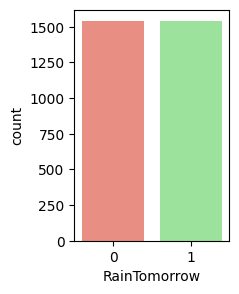

In [108]:
#@title Balance de RainTomorrow (No/Yes)
cols= ["salmon","lightgreen"]
plt.figure(figsize=(2, 3))
sns.countplot(x=df_smote['RainTomorrow'], palette= cols)
print(df_smote['RainTomorrow'].value_counts())
plt.show()

## Análisis de las distribuciones

In [ ]:
#@title Matriz de Correlación
corr = df_std.corr()
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()

In [109]:
columnas = [col for col in df_smote.columns if ((col != 'RainTomorrow') & (col != 'RainfallTomorrow'))]

<Figure size 1200x800 with 0 Axes>

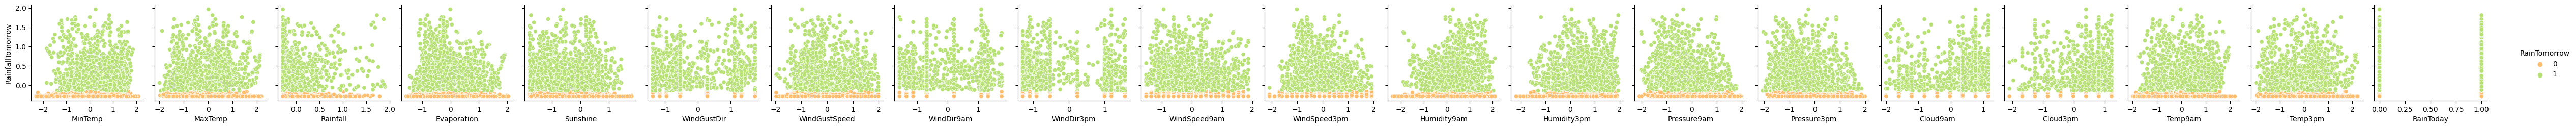

In [110]:
plt.figure(figsize=(12, 8))
sns.pairplot(df_smote, hue='RainTomorrow',x_vars=columnas,y_vars='RainfallTomorrow', palette='RdYlGn')
plt.show()

<Figure size 1200x800 with 0 Axes>

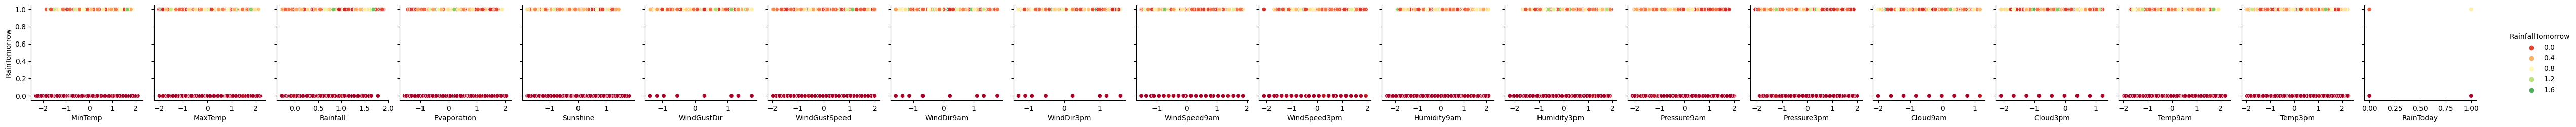

In [111]:
plt.figure(figsize=(12, 8))
sns.pairplot(df_smote, hue='RainfallTomorrow',x_vars=columnas,y_vars='RainTomorrow', palette='RdYlGn')
plt.show()

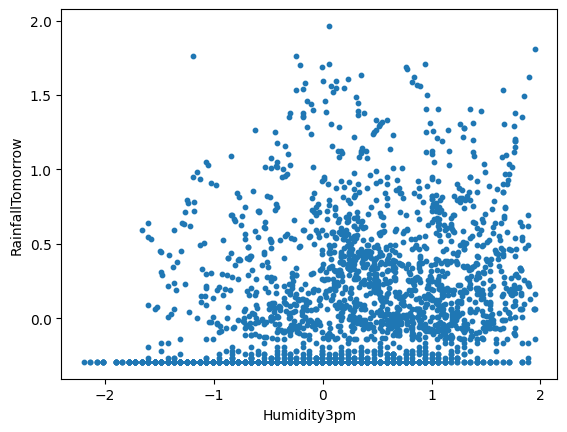

<Figure size 300x200 with 0 Axes>

In [68]:
# Relación entre la Humedad a las 3pm y la cantidad de lluvia de mañana
f ,ax = plt.subplots()
plt.figure(figsize=(3, 2))
ax.scatter(df_smote['Humidity3pm'], df_smote['RainfallTomorrow'], s= 10)
ax.set_xlabel('Humidity3pm')
ax.set_ylabel('RainfallTomorrow')
plt.show()

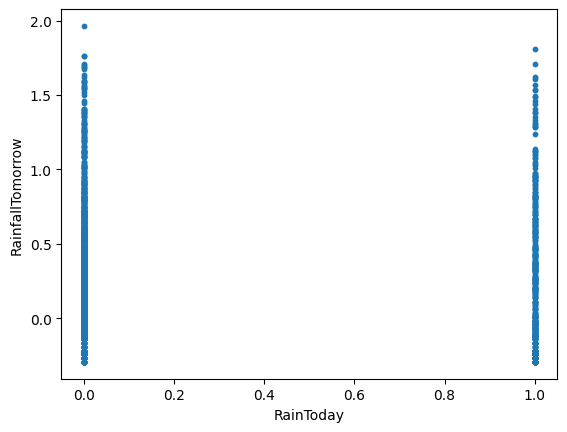

<Figure size 300x200 with 0 Axes>

In [69]:
# Relación entre la lluvia de hoy y la cantidad de mañana
f ,ax = plt.subplots()
plt.figure(figsize=(3, 2))
ax.scatter(df_smote['RainToday'], df_smote['RainfallTomorrow'], s= 10)
ax.set_xlabel('RainToday')
ax.set_ylabel('RainfallTomorrow')
plt.show()

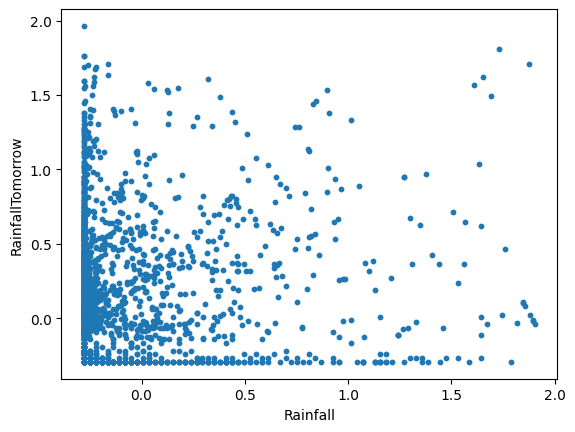

<Figure size 300x200 with 0 Axes>

In [70]:
# Relación entre la cantidad de lluvia de hoy y la cantidad de mañana
f ,ax = plt.subplots()
plt.figure(figsize=(3, 2))
ax.scatter(df_smote['Rainfall'], df_smote['RainfallTomorrow'], s= 10)
ax.set_xlabel('Rainfall')
ax.set_ylabel('RainfallTomorrow')
plt.show()

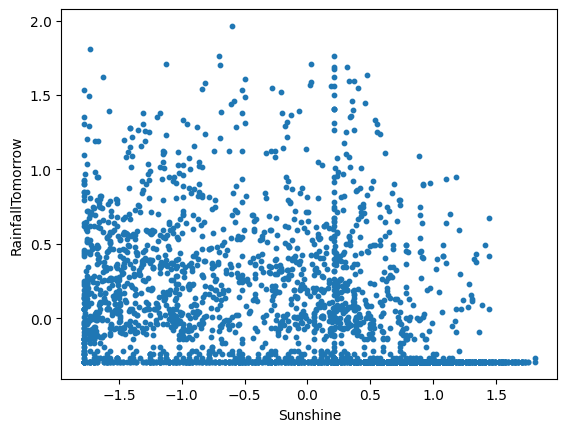

<Figure size 300x200 with 0 Axes>

In [71]:
# Relación entre la cantidad de lluvia de hoy y la cantidad de mañana
f ,ax = plt.subplots()
plt.figure(figsize=(3, 2))
ax.scatter(df_smote['Sunshine'], df_smote['RainfallTomorrow'], s= 10)
ax.set_xlabel('Sunshine')
ax.set_ylabel('RainfallTomorrow')
plt.show()

# 3) Regresiones

NOTA: Las variables a predecir, según la consigna, son "RainTomorrow" (categórica, para un problema de **clasificación**) y "RainfallTomorrow" (continua, para un problema de **regresión**).

Analizando los coeficientes de correlación entre esas variables y el resto (se descartan las que corresponden al día siguiente pues no admiten la posibilidad de predecir), las candidatas a ser elegidas para predecirlas son las siguientes.

* RainfallTomorrow: Humidity3pm (0,25) - Cloud3pm (0.21) - Rainfall (0,14) - Sunshine (-0,25)

* RainTomorrow: Humidity3pm (0,30) - Cloud3pm (0.25) - Rainfall (0,17) - Sunshine (-0,32)


## Regresión Lineal

Comenzamos con las variables "Humidity3pm", "Cloud3pm" y "Rainfall" para analizar su relación con la variable continua a predecir "RainfallTomorrow".

### Variable a predecir: RainfallTomorrow

Error cuadrático medio (MSE): 0.14
Coeficiente de determinación (R^2): -0.19



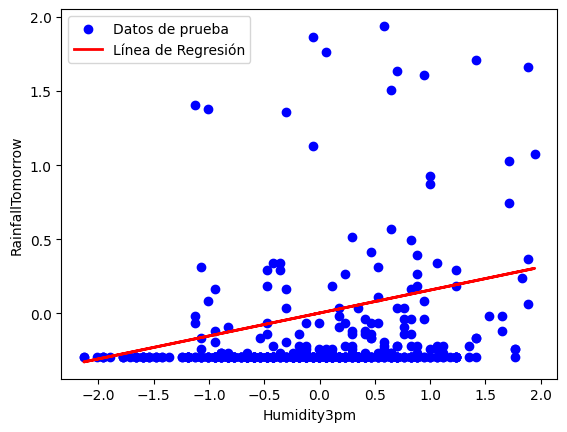

In [115]:
#@title Relación "Humidity3pm" con "RainfallTomorrow"
# Características (X) y la variable objetivo (y)
X_train = df_smote[['Humidity3pm']].values.reshape(-1, 1)
y_train = df_smote['RainfallTomorrow'].values

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test[['Humidity3pm']].values.reshape(-1, 1)
y_test = df_test['RainfallTomorrow'].values

# Modelo de regresión lineal
model = LinearRegression()
# Entrenamiento del modelo (Train)
model.fit(X_train, y_train)
# Predicciones en el conjunto de prueba (Test)
y_pred = model.predict(X_test)

# Métricas del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Outputs
print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R^2): {r2:.2f}\n')

# Grafica los datos y la línea de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Humidity3pm')
plt.ylabel('RainfallTomorrow')
plt.legend()
plt.show()

Error cuadrático medio (MSE): 0.15
Coeficiente de determinación (R^2): -0.24


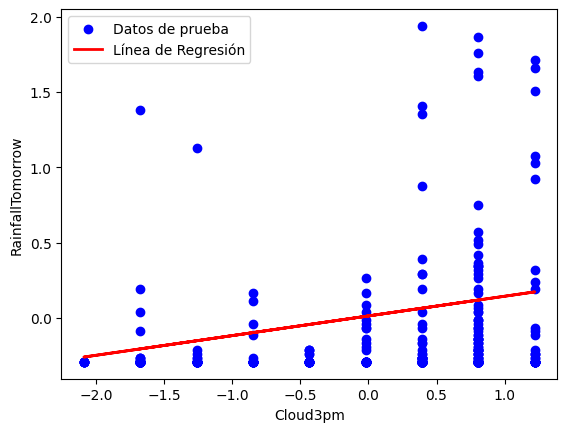

In [116]:
#@title Relación "Cloud3pm" con "RainfallTomorrow"
# Características (X) y la variable objetivo (y)
X_train = df_smote[['Cloud3pm']].values.reshape(-1, 1)
y_train = df_smote['RainfallTomorrow'].values

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test[['Cloud3pm']].values.reshape(-1, 1)
y_test = df_test['RainfallTomorrow'].values

# Modelo de regresión lineal
model = LinearRegression()
# Entrenamiento del modelo (Train)
model.fit(X_train, y_train)
# Predicciones en el conjunto de prueba (Test)
y_pred = model.predict(X_test)

# Métricas del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Outputs
print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R^2): {r2:.2f}')

# Grafica los datos y la línea de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Cloud3pm')
plt.ylabel('RainfallTomorrow')
plt.legend()
plt.show()

Error cuadrático medio (MSE): 0.17
Coeficiente de determinación (R^2): -0.38


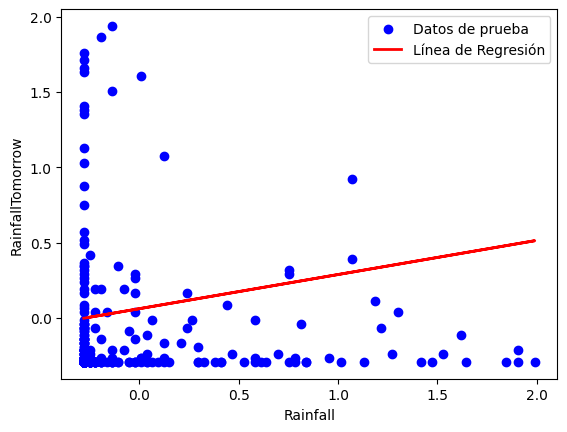

In [117]:
#@title Relación "Rainfall" con "RainfallTomorrow"
# Características (X) y la variable objetivo (y)
X_train = df_smote[['Rainfall']].values.reshape(-1, 1)
y_train = df_smote['RainfallTomorrow'].values

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test[['Rainfall']].values.reshape(-1, 1)
y_test = df_test['RainfallTomorrow'].values

# Modelo de regresión lineal
model = LinearRegression()
# Entrenamiento del modelo (Train)
model.fit(X_train, y_train)
# Predicciones en el conjunto de prueba (Test)
y_pred = model.predict(X_test)

# Métricas del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Outputs
print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R^2): {r2:.2f}')

# Grafica los datos y la línea de regresión
plt.scatter(X_test, y_test, color='blue', label='Datos de prueba')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')
plt.xlabel('Rainfall')
plt.ylabel('RainfallTomorrow')
plt.legend()
plt.show()

Un coeficiente de determinación negativo indica que el modelo de regresión no se ajusta bien a los datos y es una señal de que el modelo es peor que un modelo constante que simplemente predice la media de la variable objetivo para todos los puntos de datos. En otras palabras, el modelo no está capturando la variabilidad en los datos y no está haciendo predicciones útiles.

Implementamos un modelo de regresión lineal con el conjunto completo de atributos.

In [120]:
#@title Regresión lineal
# Características (X) y la variable objetivo (y) para el conjunto de entrenamiento
X_train = df_smote.drop(['RainfallTomorrow'], axis=1)
y_train = df_smote['RainfallTomorrow']

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test.drop(['RainfallTomorrow'], axis=1)
y_test = df_test['RainfallTomorrow']

# Modelo de regresión lineal
model = LinearRegression()
# Entrenamiento del modelo
model.fit(X_train, y_train)
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Métricas del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R^2): {r2:.2f}\n')

Error cuadrático medio (MSE): 0.07
Coeficiente de determinación (R^2): 0.46



## Regresión Lineal con Gradiente Descendiente

In [121]:
#@title Gradiente Descendiente

# Características (X) y la variable objetivo (y) para el conjunto de entrenamiento
X_train = df_smote.drop(['RainfallTomorrow'], axis=1)
y_train = df_smote['RainfallTomorrow']

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test.drop(['RainfallTomorrow'], axis=1)
y_test = df_test['RainfallTomorrow']

# Escala las características para el gradiente descendiente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación del modelo
model_sgd = SGDRegressor(max_iter=10000, random_state=42)

# Entrenamiento del modelo (Train)
model_sgd.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba (Test)
y_pred_sgd = model_sgd.predict(X_test_scaled)

# Métricas del modelo
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

# Outputs
print('Resultados con Gradiente Descendiente:')
print(f'Error cuadrático medio (MSE): {mse_sgd:.2f}')
print(f'Coeficiente de determinación (R^2): {r2_sgd:.2f}')


Resultados con Gradiente Descendiente:
Error cuadrático medio (MSE): 0.07
Coeficiente de determinación (R^2): 0.46


## Regularización

In [122]:
#@title Lasso, Ridge, ElasticNet

# Características (X) y la variable objetivo (y) para el conjunto de entrenamiento
X_train = df_smote.drop(['RainfallTomorrow'], axis=1)
y_train = df_smote['RainfallTomorrow']

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test.drop(['RainfallTomorrow'], axis=1)
y_test = df_test['RainfallTomorrow']

# Escala las características para el gradiente descendiente
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación de los modelos (Lasso, Ridge, Elastic Net)
model_lasso = Lasso(alpha=0.01) # 0,01
model_ridge = Ridge(alpha=0.01) # 1.0
model_elastic = ElasticNet(alpha=0.01, l1_ratio=0.5) #0.01 - 0.5

# Entrenamiento de los modelos (Train)
model_lasso.fit(X_train_scaled, y_train)
model_ridge.fit(X_train_scaled, y_train)
model_elastic.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba (Test)
y_pred_lasso = model_lasso.predict(X_test_scaled)
y_pred_ridge = model_ridge.predict(X_test_scaled)
y_pred_elastic = model_elastic.predict(X_test_scaled)

# Métricas del modelo
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_elastic = r2_score(y_test, y_pred_elastic)

# Outputs
print('Resultados con Regularización (Lasso):')
print(f'Error cuadrático medio (MSE): {mse_lasso:.2f}')
print(f'Coeficiente de determinación (R^2): {r2_lasso:.2f}')
print("----------")
print('Resultados con Regularización (Ridge):')
print(f'Error cuadrático medio (MSE): {mse_ridge:.2f}')
print(f'Coeficiente de determinación (R^2): {r2_ridge:.2f}')
print("----------")
print('Resultados con Regularización (Elastic Net):')
print(f'Error cuadrático medio (MSE): {mse_elastic:.2f}')
print(f'Coeficiente de determinación (R^2): {r2_elastic:.2f}')


Resultados con Regularización (Lasso):
Error cuadrático medio (MSE): 0.06
Coeficiente de determinación (R^2): 0.49
----------
Resultados con Regularización (Ridge):
Error cuadrático medio (MSE): 0.07
Coeficiente de determinación (R^2): 0.46
----------
Resultados con Regularización (Elastic Net):
Error cuadrático medio (MSE): 0.06
Coeficiente de determinación (R^2): 0.48


# 4) Clasificación con regresión logística

NOTA: Las variables a predecir, según la consigna, son "RainTomorrow" (categórica) y "RainfallTomorrow" (continua). Analizando los coeficientes de correlación entre esas variables y el resto (se descartan las que corresponden al día siguiente pues no admiten la posibilidad de predecir), las candidatas a ser elegidas para predecirlas son las siguientes.

* RainfallTomorrow: Humidity3pm (0,25) - Cloud3pm (0.21) - Rainfall (0,14) - Sunshine (-0,25)

* RainTomorrow: Humidity3pm (0,30) - Cloud3pm (0.25) - Rainfall (0,17) - Sunshine (-0,32)

**REGRESIÓN LOGÍSTICA:** Comenzamos con las variables "Humidity3pm", "Cloud3pm" y "Rainfall" para analizar su relación con la variable continua a predecir "RainTomorrow".

In [ ]:
df_smote

## Una variable explicativa

In [124]:
# Características (X) y la variable objetivo (y)
X_train = df_smote[['Humidity3pm']].values.reshape(-1, 1)
y_train = df_smote['RainTomorrow'].values

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test[['Humidity3pm']].values.reshape(-1, 1)
y_test = df_test['RainTomorrow'].values

# Modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrenamiento
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [125]:
# Calcular métricas de evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calcular el ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

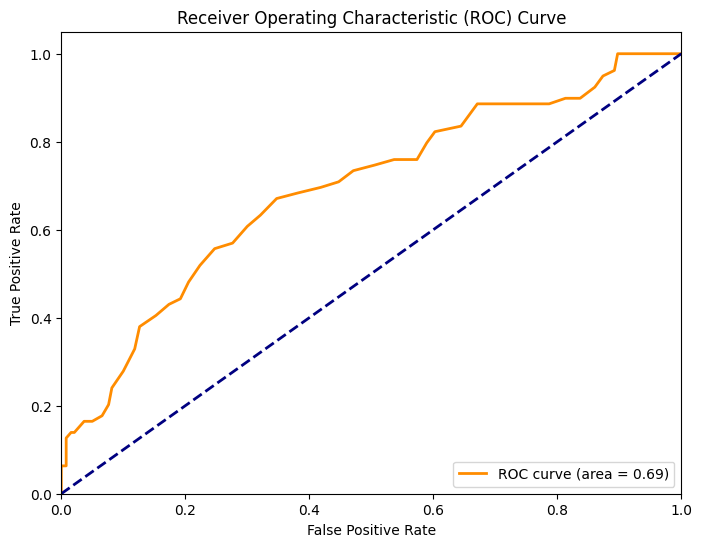

In [126]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

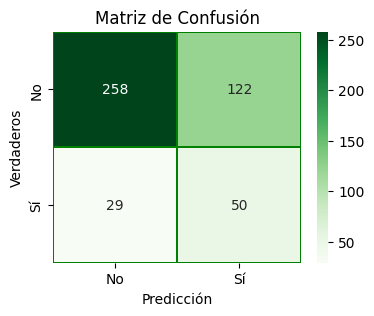

In [127]:
# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)

# Crear una figura y un eje para la matriz de confusión
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Greens", linewidths=0.1, linecolor='green', cbar=True)

# Añadir etiquetas a los ejes y al gráfico
plt.xlabel('Predicción')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión')
plt.xticks(np.arange(2) + 0.5, ['No', 'Sí'])
plt.yticks(np.arange(2) + 0.5, ['No', 'Sí'])
plt.show()

In [128]:
# Imprimir las métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.67
Precision: 0.29
Recall: 0.63
F1 Score: 0.40
ROC-AUC: 0.69


NOTA: Se observa que una sola característica es deficiente para explicar/predecir el comportamiento del dia siguiente. Para este problema, las variables explican mejor el fenómeno cuando actúan en conjunto.

## Variables explicativas combinadas

In [129]:
# Características (X) y la variable objetivo (y) para el conjunto de entrenamiento
X_train = df_smote.drop(['RainTomorrow'], axis=1)
y_train = df_smote['RainTomorrow']

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test.drop(['RainTomorrow'], axis=1)
y_test = df_test['RainTomorrow']

# Modelo de regresión logística
model = LogisticRegression(random_state=42)

# Entrenamiento
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [130]:
# Calcular métricas de evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calcular el ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

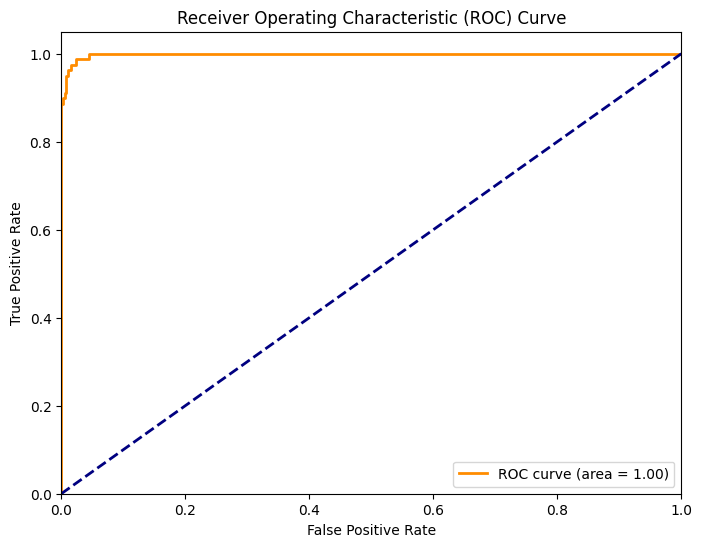

In [131]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

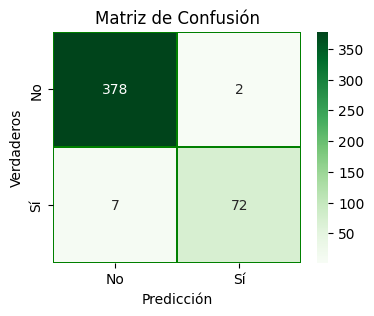

In [132]:
# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Greens", linewidths=0.1, linecolor='green', cbar=True)
plt.xlabel('Predicción')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión')
plt.xticks(np.arange(2) + 0.5, ['No', 'Sí'])
plt.yticks(np.arange(2) + 0.5, ['No', 'Sí'])
plt.show()

In [133]:
# Imprimir las métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.98
Precision: 0.97
Recall: 0.91
F1 Score: 0.94
ROC-AUC: 1.00


NOTA: No se observan mejoras significativas en las métricas al combinar las variables que tienen más correlación con la variable objetivo. Probablemente sea necesario aplicar más técnicas de ajustes a los datos y el modelo.
Sí se observa una notable mejoría si se considera el dataset completo. El modelo tiende a sobreajustar.

# 5) Modelos base para regresión y clasificación

In [152]:
#@title Regresión

# Características (X) y la variable objetivo (y) para el conjunto de entrenamiento
X_train = df_smote.drop(['RainfallTomorrow'], axis=1)
y_train = df_smote['RainfallTomorrow']

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test.drop(['RainfallTomorrow'], axis=1)
y_test = df_test['RainfallTomorrow']

# modelo con Regresión Lineal
reg = LinearRegression()
reg.fit(X_train, y_train)

# predicciones en el conjunto de prueba
y_pred = reg.predict(X_test)

# rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R^2): {r2:.2f}\n')

Error cuadrático medio (MSE): 0.07
Coeficiente de determinación (R^2): 0.46



In [154]:
#@title Clasificación

# Características (X) y la variable objetivo (y) para el conjunto de entrenamiento
X_train = df_smote.drop(['RainTomorrow'], axis=1)
y_train = df_smote['RainTomorrow']

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test.drop(['RainTomorrow'], axis=1)
y_test = df_test['RainTomorrow']

# Modelo de Clasificación
# clf = RandomForestClassifier(n_estimators=100, random_state=42) # con Random Forest
clf = LogisticRegression(random_state=42) # con Regresión Logística

# Entrenar el modelo
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.98
Precision: 0.97
Recall: 0.91
F1 Score: 0.94
ROC-AUC: 1.00


# 6) Redes neuronales

## Clasificación con TensorFlow

### Modelo

In [136]:
# Características (X) y la variable objetivo (y) para el conjunto de entrenamiento
X_train = df_smote.drop(['RainTomorrow'], axis=1)
y_train = df_smote['RainTomorrow']

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test.drop(['RainTomorrow'], axis=1)
y_test = df_test['RainTomorrow']

In [137]:
# Modelo de clasificación
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [138]:
# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [139]:
# Entrenamiento
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
155/155 [==============================] - 9s 6ms/step - loss: 0.4860 - accuracy: 0.7609 - val_loss: 0.5068 - val_accuracy: 0.7638
Epoch 2/50
155/155 [==============================] - 1s 4ms/step - loss: 0.3337 - accuracy: 0.8444 - val_loss: 0.3115 - val_accuracy: 0.8738
Epoch 3/50
155/155 [==============================] - 1s 4ms/step - loss: 0.2342 - accuracy: 0.9105 - val_loss: 0.2358 - val_accuracy: 0.8932
Epoch 4/50
155/155 [==============================] - 1s 4ms/step - loss: 0.1669 - accuracy: 0.9340 - val_loss: 0.1328 - val_accuracy: 0.9482
Epoch 5/50
155/155 [==============================] - 1s 4ms/step - loss: 0.1196 - accuracy: 0.9571 - val_loss: 0.0778 - val_accuracy: 0.9676
Epoch 6/50
155/155 [==============================] - 1s 4ms/step - loss: 0.0842 - accuracy: 0.9680 - val_loss: 0.0529 - val_accuracy: 0.9693
Epoch 7/50
155/155 [==============================] - 1s 4ms/step - loss: 0.0798 - accuracy: 0.9704 - val_loss: 0.0385 - val_accuracy: 0.9838
Epoch 

In [140]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida test: {loss}')
print(f'Exactitud test: {accuracy}')

15/15 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9826
Pérdida test: 0.06011238694190979
Exactitud test: 0.9825708270072937


In [141]:
# Predicciones en el conjunto de prueba
predictions_prob = model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [142]:
# Aplicar umbral para obtener etiquetas binarias
threshold = 0.5  # Ajusta el umbral según sea necesario
predictions = (predictions_prob > threshold).astype(int)

### Métricas y gráfico

In [143]:
# Evaluación del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

Accuracy: 98.26%

Confusion Matrix:
 [[379   1]
 [  7  72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       380
           1       0.99      0.91      0.95        79

    accuracy                           0.98       459
   macro avg       0.98      0.95      0.97       459
weighted avg       0.98      0.98      0.98       459



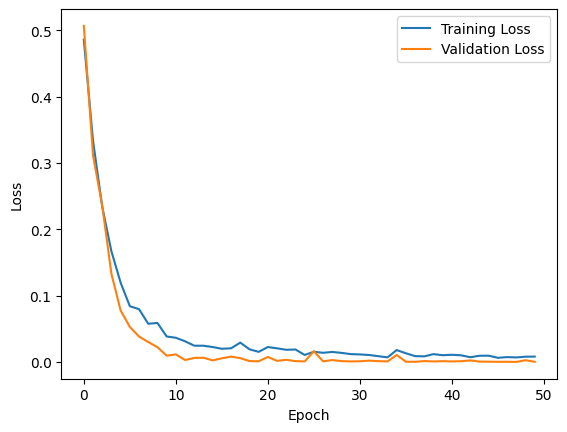

In [144]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

## Regresión con TensorFlow

### Modelo

In [145]:
# Características (X) y la variable objetivo (y) para el conjunto de entrenamiento
X_train = df_smote.drop(['RainfallTomorrow'], axis=1)
y_train = df_smote['RainfallTomorrow']

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test.drop(['RainfallTomorrow'], axis=1)
y_test = df_test['RainfallTomorrow']

In [146]:
# Modelo de regresión
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='linear')  # Capa de salida con activación lineal para regresión
])

In [147]:
# Compilación del modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mae'])

In [148]:
# Entrenamiento
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/500
39/39 [==============================] - 2s 8ms/step - loss: 0.2180 - mean_squared_error: 0.2180 - mae: 0.3470 - val_loss: 0.1887 - val_mean_squared_error: 0.1887 - val_mae: 0.3026
Epoch 2/500
39/39 [==============================] - 0s 4ms/step - loss: 0.1418 - mean_squared_error: 0.1418 - mae: 0.2750 - val_loss: 0.1768 - val_mean_squared_error: 0.1768 - val_mae: 0.2921
Epoch 3/500
39/39 [==============================] - 0s 5ms/step - loss: 0.1221 - mean_squared_error: 0.1221 - mae: 0.2484 - val_loss: 0.1641 - val_mean_squared_error: 0.1641 - val_mae: 0.2827
Epoch 4/500
39/39 [==============================] - 0s 4ms/step - loss: 0.1103 - mean_squared_error: 0.1103 - mae: 0.2331 - val_loss: 0.1592 - val_mean_squared_error: 0.1592 - val_mae: 0.2788
Epoch 5/500
39/39 [==============================] - 0s 4ms/step - loss: 0.1014 - mean_squared_error: 0.1014 - mae: 0.2197 - val_loss: 0.1529 - val_mean_squared_error: 0.1529 - val_mae: 0.2737
Epoch 6/500
39/39 [================

In [149]:
# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


### Métricas y gráfico

In [150]:
# Métricas de regresión
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error (MSE): 0.06
R2 Score: 0.53



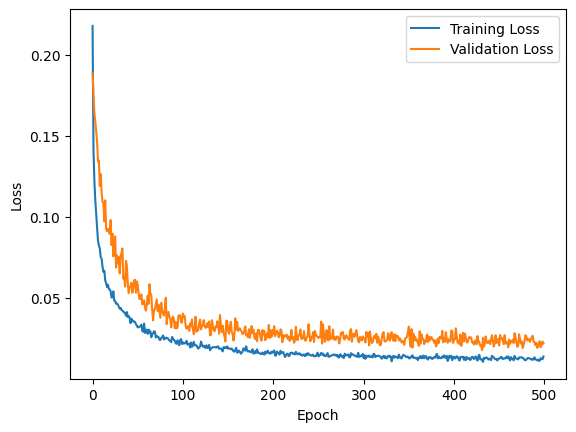

In [151]:
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R2 Score: {:.2f}\n".format(r2))

# Graficar la curva de aprendizaje
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 7) Optimización de hiperparámetros

## Validación Cruzada

### CV - Regresión

### CV - Clasificación

## RandomSearch, GridSearch, Optuna

### Optimización de Hiperparámetros - Regresión

In [158]:
#@title RandomSearch
# Características (X) y la variable objetivo (y) para el conjunto de entrenamiento
X_train = df_smote.drop(['RainfallTomorrow'], axis=1)
y_train = df_smote['RainfallTomorrow']

# Características (X) y la variable objetivo (y) para el conjunto de prueba
X_test = df_test.drop(['RainfallTomorrow'], axis=1)
y_test = df_test['RainfallTomorrow']

# Función para construir el modelo de regresión
def create_regression_model(layers, dropout_rate, optimizer):
    model = Sequential()
    for layer in layers:
        model.add(Dense(layer, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))  # Capa de salida con activación lineal para regresión
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Espacio de búsqueda
param_dist = {
    'layers': [[128, 64], [256, 128, 64], [64, 32, 16]],
    'dropout_rate': [0.2, 0.3, 0.5],
    'optimizer': ['adam', 'rmsprop']
}

# Modelo KerasRegressor
model = KerasRegressor(build_fn=create_regression_model, verbose=0)
# Random Search
random_search = RandomizedSearchCV(model, param_dist, cv=3, n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
random_search_result = random_search.fit(X_train, y_train)
# Imprimir los mejores hiperparámetros encontrados
print("Mejores Hiperparámetros: ", random_search_result.best_params_)


In [ ]:
#@title Métricas con los hiperparámetros optimizados

# Para Random Search
random_best_model = random_search_result.best_estimator_
random_best_params = random_search_result.best_params_
random_best_predictions = random_best_model.predict(X_test)

# Evaluar el modelo
random_mse = mean_squared_error(y_test, random_best_predictions)
random_r2 = r2_score(y_test, random_best_predictions)

print("Random Search - Mejores Hiperparámetros: ", random_best_params)
print("Random Search - Mean Squared Error (MSE): {:.2f}".format(random_mse))
print("Random Search - R2 Score: {:.2f}".format(random_r2))

In [ ]:
#@title GridSearch

# Espacio de búsqueda
param_grid = {
    'layers': [[128, 64], [256, 128, 64], [64, 32, 16]],
    'dropout_rate': [0.2, 0.3, 0.5],
    'optimizer': ['adam', 'rmsprop']
}

# Modelo KerasRegressor
model = KerasRegressor(build_fn=create_regression_model, verbose=0)
# Grid Search
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search_result = grid_search.fit(X_train, y_train)
# Imprimir los mejores hiperparámetros encontrados
print("Mejores Hiperparámetros: ", grid_search_result.best_params_)

In [ ]:
#@title Métricas con los hiperparámetros optimizados

# Para Grid Search
grid_best_model = grid_search_result.best_estimator_
grid_best_params = grid_search_result.best_params_
grid_best_predictions = grid_best_model.predict(X_test)

# Evaluar el modelo
grid_mse = mean_squared_error(y_test, grid_best_predictions)
grid_r2 = r2_score(y_test, grid_best_predictions)

print("\nGrid Search - Mejores Hiperparámetros: ", grid_best_params)
print("Grid Search - Mean Squared Error (MSE): {:.2f}".format(grid_mse))
print("Grid Search - R2 Score: {:.2f}".format(grid_r2))

### Optimización de Hiperparámetros - Clasificación

In [ ]:
#@title RandomSearch

# Conjuntos 'X' y 'y'
X = df_std.drop('RainTomorrow', axis=1)
y = df_std['RainTomorrow']

# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función para construir el modelo
def create_model(layers, dropout_rate, optimizer):
    model = Sequential()
    for layer in layers:
        model.add(Dense(layer, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Espacio de búsqueda
param_dist = {
    'layers': [[128, 64], [256, 128, 64], [64, 32, 16]],
    'dropout_rate': [0.2, 0.3, 0.5],
    'optimizer': ['adam', 'rmsprop']
}
# Modelo KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)
# Random Search
random_search = RandomizedSearchCV(model, param_dist, cv=3, n_iter=5, n_jobs=-1, verbose=2)
random_search_result = random_search.fit(X_train, y_train)
# Imprimir los mejores hiperparámetros encontrados
print("Mejores Hiperparámetros: ", random_search_result.best_params_)

In [ ]:
#@title Métricas con los hiperparámetros optimizados

# Para RandomSearch
Random_best_model = random_search_result.best_estimator_
random_best_params = random_search_result.best_params_
random_best_predictions = random_best_model.predict(X_test)

# Evaluación del modelo
random_accuracy = accuracy_score(y_test, random_best_predictions)
random_conf_matrix = confusion_matrix(y_test, random_best_predictions)
random_classification_report = classification_report(y_test, random_best_predictions)

# Salidas
print("Random Search - Mejores Hiperparámetros: ", random_best_params)
print("Random Search - Accuracy: {:.2f}%".format(random_accuracy * 100))
print("Random Search - Confusion Matrix:\n", random_conf_matrix)
print("Random Search - Classification Report:\n", random_classification_report)

In [ ]:
#@title GridSearch
# Espacio de búsqueda
param_grid = {
    'layers': [[128, 64], [256, 128, 64], [64, 32, 16]],
    'dropout_rate': [0.2, 0.3, 0.5],
    'optimizer': ['adam', 'rmsprop']
}

# Modelo KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)
# Grid Search
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_result = grid_search.fit(X_train, y_train)
# Imprimir los mejores hiperparámetros encontrados
print("Mejores Hiperparámetros: ", grid_search_result.best_params_)

In [ ]:
#@title Métricas con los hiperparámetros optimizados

# Para Grid Search
grid_best_model = grid_search_result.best_estimator_
grid_best_params = grid_search_result.best_params_
grid_best_predictions = grid_best_model.predict(X_test)

# Evaluar el modelo
grid_accuracy = accuracy_score(y_test, grid_best_predictions)
grid_conf_matrix = confusion_matrix(y_test, grid_best_predictions)
grid_classification_report = classification_report(y_test, grid_best_predictions)

print("\nGrid Search - Mejores Hiperparámetros: ", grid_best_params)
print("Grid Search - Accuracy: {:.2f}%".format(grid_accuracy * 100))
print("Grid Search - Confusion Matrix:\n", grid_conf_matrix)
print("Grid Search - Classification Report:\n", grid_classification_report)